In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

In [2]:
imgpath = "C:/Users/User/OpenCv/misc/5.1.12.tiff"
img = cv2.imread(imgpath)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

## 1) Low Pass Filter

In [3]:
box = cv2.boxFilter(img, -1, (53, 53)) ## (53, 53) => size of filter
blur = cv2.blur(img, (13, 13))
gaussian = cv2.GaussianBlur(img, (17, 17), 0)

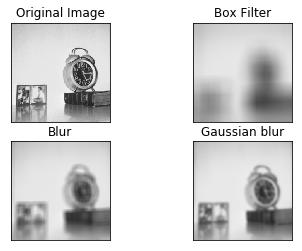

In [4]:
titles = ["Original Image", "Box Filter", "Blur", "Gaussian blur"]
outputs = [img, box, blur, gaussian]

for i in range(len(outputs)):
    plt.subplot(2, 2, i + 1)
    plt.imshow(outputs[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

## 2) Median Blur Filter

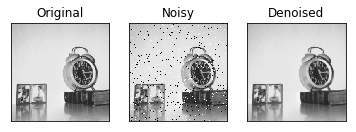

In [5]:
noisy = np.zeros(img.shape, np.uint8)
rows, columns, channels = noisy.shape

p = 0.05 ## probability of noise
for i in range(rows):
    for j in range(columns):
        r = random.random()
        if(r < p/2):
            noisy[i][j] = [0, 0, 0] ## pepper sprinkled
        elif(r < p):
            noisy[i][j] = [255, 255, 255] ## salt sprinkled
        else:
            noisy[i][j] = img[i][j]

## MedianBlur filter used to remove salt and peeper noise
denoised = cv2.medianBlur(noisy, 3) ## 3 * 3 Filter
output = [img, noisy, denoised]
titles = ["Original", "Noisy", "Denoised"]

for i in range(len(output)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(output[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

## 3) High Pass Filter

#### 3a) Laplacian Filter

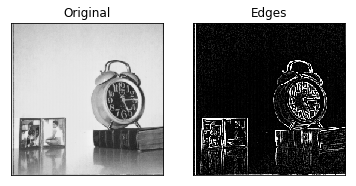

In [6]:
edges = cv2.Laplacian(img, -1, ksize = 3, scale = 1, delta = 0, borderType = cv2.BORDER_DEFAULT)
output = [img, edges]
titles = ["Original", "Edges"]

for i in range(len(output)):
    plt.subplot(1, 2, i + 1)
    plt.imshow(output[i], cmap = "gray")
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

#### 3b) Sobel Filter

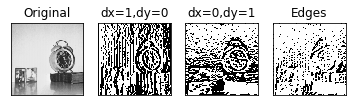

In [7]:
edgesx = cv2.Sobel(img, -1, dx = 1, dy = 0, ksize = 11, scale = 1, delta = 0, borderType = cv2.BORDER_DEFAULT)
edgesy = cv2.Sobel(img, -1, dx = 0, dy = 1, ksize = 11, scale = 1, delta = 0, borderType = cv2.BORDER_DEFAULT)
edges = edgesx + edgesy
output = [img, edgesx, edgesy, edges]
titles = ["Original", "dx=1,dy=0", "dx=0,dy=1", "Edges"]

for i in range(len(output)):
    plt.subplot(1, 4, i + 1)
    plt.imshow(output[i], cmap = "gray")
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()

#### 3c) Scharr Filter

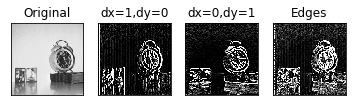

In [8]:
edgesx = cv2.Scharr(img, -1, dx = 1, dy = 0, scale = 1, delta = 0, borderType = cv2.BORDER_DEFAULT)
edgesy = cv2.Scharr(img, -1, dx = 0, dy = 1, scale = 1, delta = 0, borderType = cv2.BORDER_DEFAULT)
edges = edgesx + edgesy
output = [img, edgesx, edgesy, edges]
titles = ["Original", "dx=1,dy=0", "dx=0,dy=1", "Edges"]

for i in range(len(output)):
    plt.subplot(1, 4, i + 1)
    plt.imshow(output[i], cmap = "gray")
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
plt.show()